In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv', sep=',')
dataPredict = pd.read_csv('test.csv', sep=',')
pd.options.display.max_columns = None
pd.set_option('expand_frame_repr', False)
data.head(50)

job_level  job_duration_in_current_job_level person_level  job_duration_in_current_person_level  job_duration_in_current_branch Employee_type Employee_status  gender   age marital_status_maried(Y/N)  number_of_dependences  number_of_dependences (male)  number_of_dependences (female) Education_level   GPA year_graduated  job_duration_as_permanent_worker  job_duration_from_training  branch_rotation  job_rotation  assign_of_otherposition  annual leave  sick_leaves  Best Performance  Avg_achievement_%  Last_achievement_%  Achievement_above_100%_during3quartal achievement_target_1 achievement_target_2 achievement_target_3
0       JG05                               8.00         PG06                                  8.00                            0.50     RM_type_A       Permanent  Female  1964                          Y                      3                             1                               2         level_4  2.32           1987                              30.0                          30                9             7                        0             8            0                 0          68.850000               72.53                                    0.0      achiev_50%-100%         achiev_< 50%              reached
1       JG04                               5.17         PG04                                  2.00                            1.25     RM_type_A       Permanent    Male  1979                          Y                      3                             2                               1         level_4  3.25           2001                              15.0                          16                7             7                        9             3            0                 0          94.810000              101.13                                    3.0      achiev_50%-100%      achiev_50%-100%              reached
2       JG04                               1.83         PG03                                  1.83                            1.50     RM_type_A       Permanent    Male  1980                          Y                      1                             0                               1         level_5  3.23           2007                              15.0                          15                9             9                        0             6            0                 0          72.820000               71.30                                    0.0     achiev_100%-150%         achiev_< 50%          not_reached
3       JG04                               7.92         PG04                                  4.00                            0.17     RM_type_A       Permanent    Male  1984                          Y                      0                             0                               0         level_3  0.00           2006                               8.0                           8                5             5                        0             3            0                 0          86.890000               90.09                                    2.0      achiev_50%-100%      achiev_50%-100%          not_reached
4       JG04                               1.83         PG03                                  1.83                            2.08     RM_type_A       Permanent    Male  1984                          Y                      1                             0                               1             NaN   NaN            NaN                               7.0                           7                4             6                       11             2            1                 1          95.170000              100.72                                    2.0         achiev_< 50%         achiev_> 1.5          not_reached
5       JG04                               1.75         PG03                                  1.75                            6.25     RM_type_C       Permanent    Male  1984                          Y                      2           

In [3]:
print('job level', data.job_level.unique().shape[0])
print('person level', data.person_level.unique().shape[0])
print('employee type',data.Employee_type.unique().shape[0])
print('archievement target',data.achievement_target_1.unique().shape[0])
print((data.achievement_target_2.unique().shape[0]))
print((data.achievement_target_3.unique().shape[0]))
print('Best Performance',data['Best Performance'].unique().shape[0])

job level 4
person level 8
employee type 4
archievement target 10
10
4
Best Performance 2


In [39]:
#print('all data', len(data))
#print(data.isnull().sum())

In [136]:
fdata = data.drop(['Education_level',
                   'GPA',
                   'year_graduated',
                   'job_duration_as_permanent_worker',
                   'Avg_achievement_%',
                   'Last_achievement_%',
                   'Achievement_above_100%_during3quartal',
                   'achievement_target_1',
                   'achievement_target_2',
                   'achievement_target_3'], 
                  axis=1)


fdata2 = dataPredict.drop(['Education_level',
                   'GPA',
                   'year_graduated',
                   'job_duration_as_permanent_worker',
                   'Avg_achievement_%',
                   'Last_achievement_%',
                   'Achievement_above_100%_during3quartal',
                   'achievement_target_1',
                   'achievement_target_2',
                   'achievement_target_3'], 
                  axis=1)

In [137]:
f1data = fdata.dropna()
f1data_label = f1data['Best Performance']
f1data = f1data.drop('Best Performance', axis = 1)
data_combine = f1data.append(fdata2)
print(len(data_combine))
print(len(f1data))
#print('all data', len(data))
#print(f1data.isnull().sum())

27993
21993


In [138]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
LE = LabelEncoder()
# f1data['job_level'] = LE.fit_transform(f1data['job_level'])
# f1data['person_level'] = LE.fit_transform(f1data['person_level'])
# f1data['Employee_type'] = LE.fit_transform(f1data['Employee_type'])
# f1data['Employee_status'] = LE.fit_transform(f1data['Employee_status'])
# f1data['gender'] = LE.fit_transform(f1data['gender'])
# f1data['age'] = LE.fit_transform(f1data['age'])
# f1data['marital_status_maried(Y/N)'] = LE.fit_transform(f1data['marital_status_maried(Y/N)'])
# f1data

data_combine['job_level'] = LE.fit_transform(data_combine['job_level'])
data_combine['person_level'] = LE.fit_transform(data_combine['person_level'])
data_combine['Employee_type'] = LE.fit_transform(data_combine['Employee_type'])
data_combine['Employee_status'] = LE.fit_transform(data_combine['Employee_status'])
data_combine['gender'] = LE.fit_transform(data_combine['gender'])
data_combine['age'] = LE.fit_transform(data_combine['age'])
data_combine['marital_status_maried(Y/N)'] = LE.fit_transform(data_combine['marital_status_maried(Y/N)'])
data_combine

job_level  job_duration_in_current_job_level  person_level  job_duration_in_current_person_level  job_duration_in_current_branch  Employee_type  Employee_status  gender  age  marital_status_maried(Y/N)  number_of_dependences  number_of_dependences (male)  number_of_dependences (female)  job_duration_from_training  branch_rotation  job_rotation  assign_of_otherposition  annual leave  sick_leaves
0             2                               8.00             5                                  8.00                            0.50              0                1       0    1                           1                      3                             1                               2                          30                9             7                        0             8            0
1             1                               5.17             3                                  2.00                            1.25              0                1       1   16                           1                      3                             2                               1                          16                7             7                        9             3            0
2             1                               1.83             2                                  1.83                            1.50              0                1       1   17                           1                      1                             0                               1                          15                9             9                        0             6            0
3             1                               7.92             3                                  4.00                            0.17              0                1       1   21                           1                      0                             0                               0                           8                5             5                        0             3            0
4             1                               1.83             2                                  1.83                            2.08              0                1       1   21                           1                      1                             0                               1                           7                4             6                       11             2            1
...         ...                                ...           ...                                   ...                             ...            ...              ...     ...  ...                         ...                    ...                           ...                             ...                         ...              ...           ...                      ...           ...          ...
5995          0                               2.75             0                                  2.75                            2.75              1                1       1   24                           0                      0                             0                               0                           3                1             1                        0             1            0
5996          1                               1.17             2                                  1.17                            0.50              1                1       1   24                           1                      1                             0                               1                           4                3             3                        0             0            0
5997          1                               1.83             2                                  1.83                            1.92              0                1       1   23                           1                      2                             1                               1                           7                5             3                   

In [194]:
scaler = MinMaxScaler()
scaler.fit(data_combine)
all_data_scaled = scaler.transform(data_combine)
pred_real_data = all_data_scaled[len(all_data_scaled)-6000:]
data_for_train_test = all_data_scaled[:len(all_data_scaled)-6000]
print(len(pred_real_data))
print(len(data_for_train_test))
print(len(f1data_label))
print(all_data_scaled)

6000
21993
21993
[[0.66666667 0.91428571 0.71428571 ... 0.         0.19512195 0.        ]
 [0.33333333 0.59085714 0.42857143 ... 0.16666667 0.07317073 0.        ]
 [0.33333333 0.20914286 0.28571429 ... 0.         0.14634146 0.        ]
 ...
 [0.33333333 0.20914286 0.28571429 ... 0.         0.07317073 0.        ]
 [0.33333333 0.21942857 0.28571429 ... 0.         0.02439024 0.        ]
 [0.33333333 0.22857143 0.28571429 ... 0.         0.09756098 0.        ]]


In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_for_train_test, f1data_label, test_size=0.33, random_state=42)

In [233]:
from sklearn.ensemble import RandomForestClassifier
allScore = []
soc_score = []
# for i in range(1, 100):
#     clf = RandomForestClassifier(max_depth=2, random_state=i)
#     clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)
#     allScore.append(score)
    
#     prob_val = clf.predict_proba(X_test).T[1]
#     valY = np.array(y_test) 
#     soc_score.append(roc_auc_score(valY, prob_val))
    
clf = RandomForestClassifier(max_depth=2, random_state=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
    
#print(allScore)

In [234]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(class_weight='balanced')
logModel.fit(X_train, y_train)
print(logModel.score(X_test, y_test))

0.47864425461559656


In [235]:
from sklearn.metrics import roc_auc_score
pred = logModel.predict(X_test)
pred2 = clf.predict(X_test)
prob = logModel.predict_proba(X_test).T[1]
prob2 = clf.predict_proba(X_test).T[1]
valY = np.array(y_test) 
aaa = roc_auc_score(valY, prob)
aaa2 = roc_auc_score(y_test, prob2)
print('roc_auc score: {0:0.6f}'.format(aaa))
print('roc_auc score2: {0:0.6f}'.format(aaa2))
print(sum(y_test), len(y_test), sum(pred))
print(valY)


roc_auc score: 0.604239
roc_auc score2: 0.641052
884 7258 4132
[0 0 0 ... 0 0 0]


In [236]:
from sklearn.metrics import precision_recall_fscore_support
average_precision = precision_recall_fscore_support(y_test, pred, average='binary')
average_precision

(0.14908034849951599, 0.6968325791855203, 0.24561403508771928, None)

In [237]:
res_prob =logModel.predict_proba(pred_real_data).T[1]
print(res_prob)

[0.56887206 0.49167949 0.52460982 ... 0.58066862 0.56876143 0.51733186]


In [238]:
resDf = pd.DataFrame(res_prob)
resDf['index'] = resDf.index
resDf['Best Performance'] = resDf[0]
resDf = resDf[['index', 'Best Performance']]
resDf.to_csv('pred_result.csv', index=False)
print(resDf)

      index  Best Performance
0         0          0.568872
1         1          0.491679
2         2          0.524610
3         3          0.470250
4         4          0.561118
...     ...               ...
5995   5995          0.651243
5996   5996          0.487024
5997   5997          0.580669
5998   5998          0.568761
5999   5999          0.517332

[6000 rows x 2 columns]


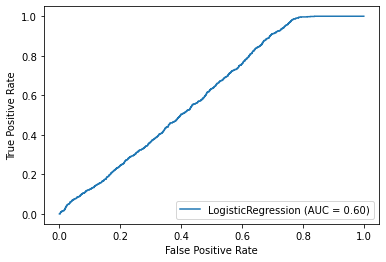

In [239]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logModel, X_test, y_test)
plt.show()